https://github.com/lukelbd/proplot/issues/79

In [1]:
import xarray as xr
import proplot as plot

In [2]:
season_clim_diff = xr.open_dataarray('season_clim_diff.nc')
season_clim_diff

<xarray.DataArray (season: 4, lat: 143, lon: 144)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lat                   (lat) float32 -90.0 -88.73239 ... 88.73239 90.0
  * lon                   (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * season                (season) object 'DJF' 'JJA' 'MAM' 'SON'
    snow_cover_threshold  float32 ...

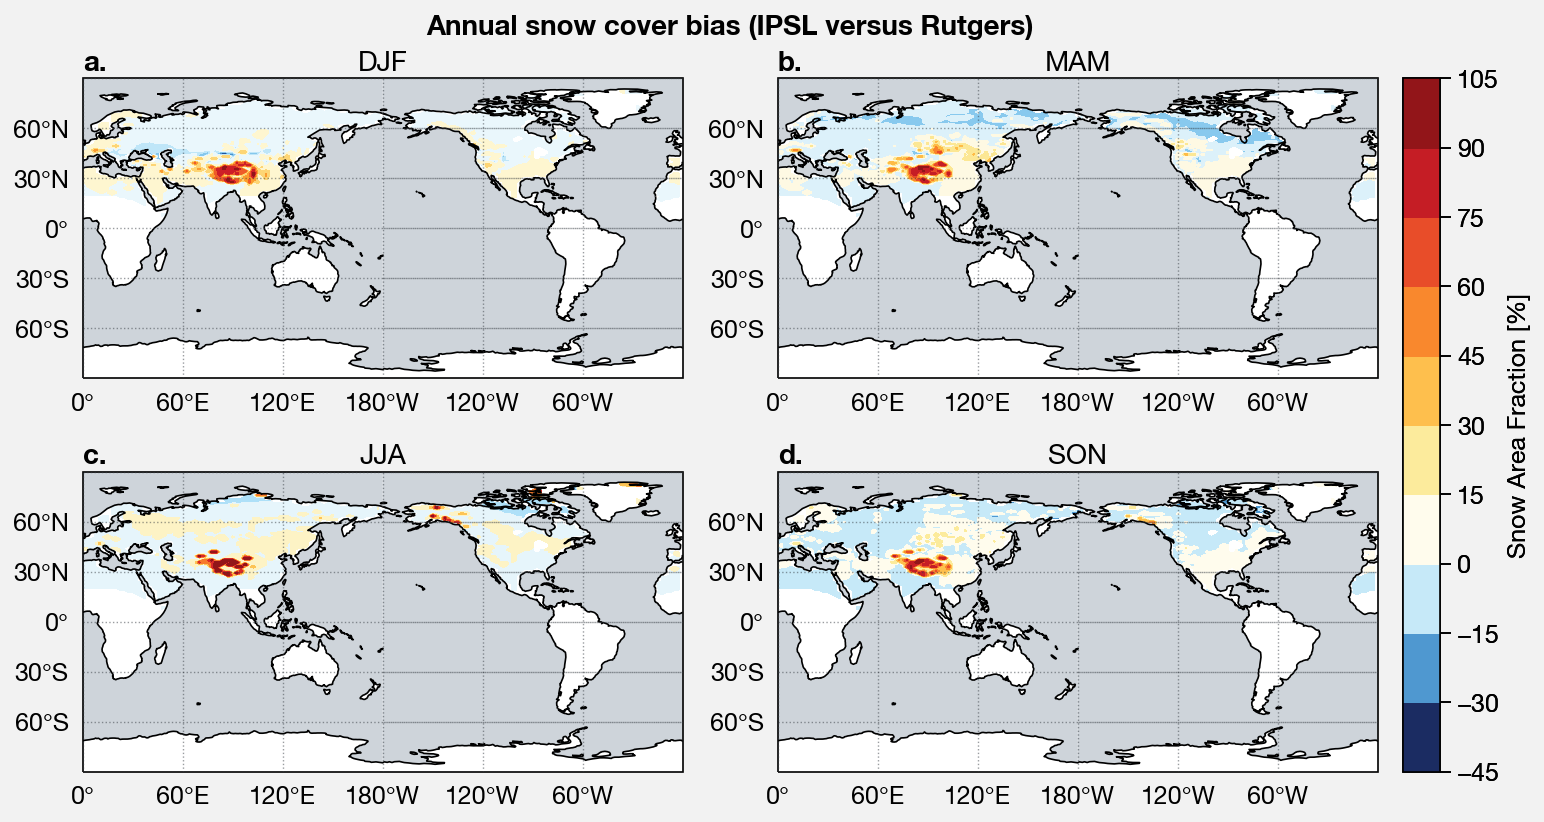

In [3]:
f, axs = plot.subplots(
    proj='cyl', proj_kw={'lon_0':180}, ncols=2, nrows=2, axwidth=3, share=3
)

seasons = ['DJF', 'MAM', 'JJA', 'SON']

for i, ax in enumerate(axs):
    m = ax.contourf(
        season_clim_diff.sel(season=seasons[i]), cmap='ColdHot', norm='midpoint'
    )
    ax.format(title=season_clim_diff.sel(season=seasons[i]).season.values)
    
f.colorbar(m, label="Snow Area Fraction [%]")
axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, 
    labels=True, lonlines=60, latlines=30, 
    coast=True, ocean=True, oceancolor='gray4',
    suptitle="Annual snow cover bias (IPSL versus Rutgers)", 
    abc=True, abcstyle='a.'
)

# f.save("proplot_subplots_share.jpg")